In [1]:
import itertools
from pathlib import Path

import numpy as np

import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import matplotlib.image as mimage
import matplotlib.tri as tri
import matplotlib.pyplot as plt
import matplotlib.offsetbox as moffsetbox

from scipy.stats import dirichlet
from mpltern.datasets import get_dirichlet_pdfs, get_triangular_grid

import papercolors as pc
from papercolors import colordict as pcd

mpl.rcParams['font.family'] = 'dejavu sans'
mpl.rcParams['figure.dpi'] = 300
fs={'normal': 10, 'small':9, 'footnote':8, 'script':7, 'tiny':5, 'heading':12}
paper_path = Path('../figures/')

In [2]:
mpl.rc("pgf", texsystem = "pdflatex", preamble = "\n".join(
    [r"\usepackage{inputenc}", 
     r"\usepackage[T1]{fontenc}",
     r"\usepackage{cmbright}",
     r'\usepackage{{amsmath}}', 
    ]))

In [3]:
mosaic = np.array([[r'$\tau$',r'$K$', r'$S$', r'$\rho$'],
                  [r'$\hat{\phi}^*_{E}\tau$', r'$K^{\prime}$', r'$S^{\prime}$', r'$\hat{\phi}^*_{H}\rho$'], 
                  [r'$\tilde{\phi}_{E}\hat{\phi}^*_{E}\tau$', '.', '.', r'$\tilde{\phi}_{H}\hat{\phi}^*_{H}\rho$']])
rotation = 30
per_subplot_kw = { r'$\rho$': {'projection':'ternary'},  r'$\hat{\phi}^*_{H}\rho$': {'projection': 'ternary', 'rotation':30}, 
                   r'$\tilde{\phi}_{H}\hat{\phi}^*_{H}\rho$':{'projection': 'ternary', 'rotation':30}}

Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown fon

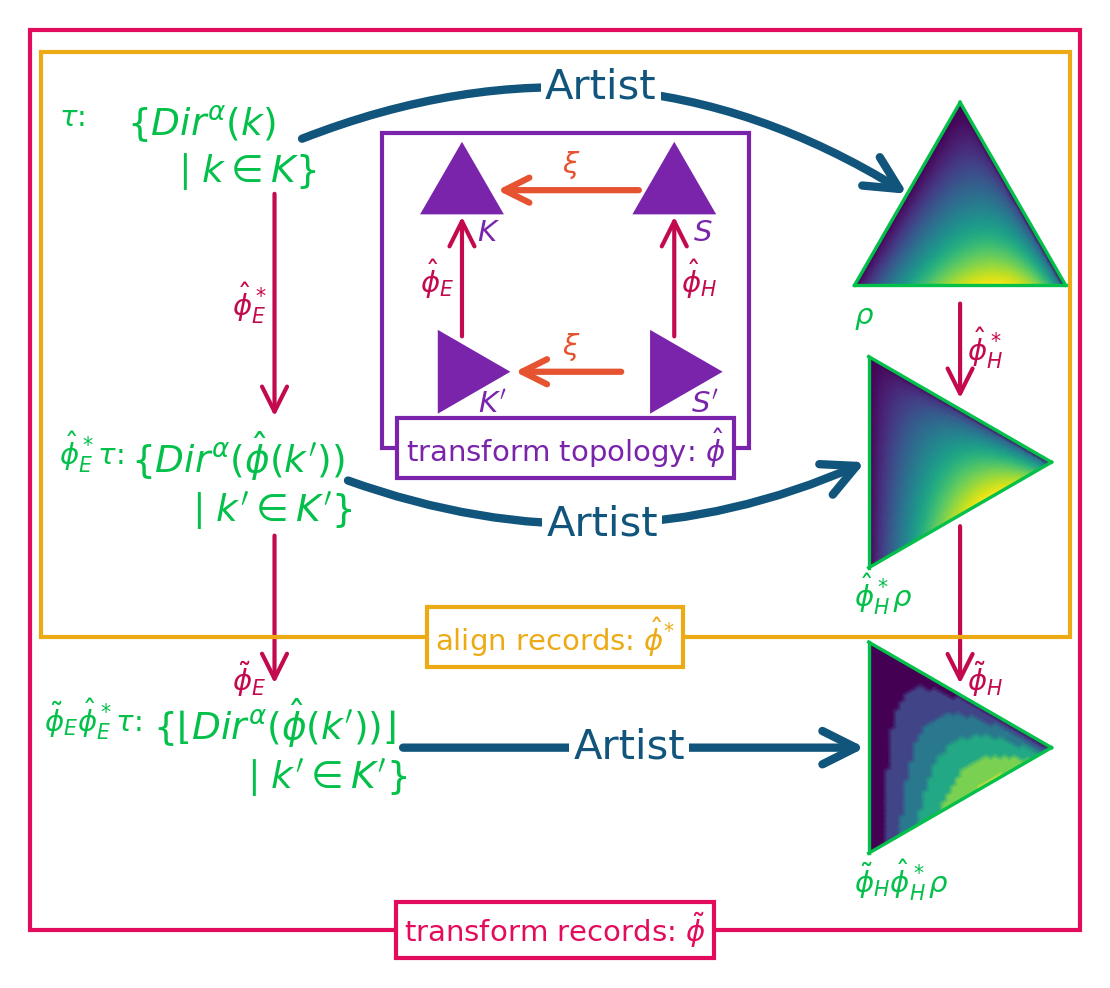

In [198]:
fig, axd = plt.subplot_mosaic(mosaic, figsize=(3.5, 3), layout='compressed', 
                              per_subplot_kw = per_subplot_kw)
for t, ax in axd.items():
    #ax.text(.5, .5, t, transform=ax.transAxes, color=pcd['monoid'], alpha=.25, size=25, ha='center', va='center')
    ax.set(xticks=[], yticks=[], aspect='equal')
    #ax.set_title(t, color=pcd['monoid'])

for an in per_subplot_kw:
    axd[an].taxis.set_ticks([])
    axd[an].laxis.set_ticks([])
    axd[an].raxis.set_ticks([])

    
alpha = (1, 1.5, 2)
rv = dirichlet(alpha)
t, l, r = get_triangular_grid(n=40)
v = [rv.pdf((ti, li, ri)) for ti, li, ri in zip(t, l, r)]

cmap = plt.get_cmap("viridis")
shading = "gouraud"

cs1 = axd[r'$\rho$'].tripcolor(t, l, r, v, cmap=cmap, shading=shading, rasterized=True)
cs2 = axd[r'$\hat{\phi}^*_{H}\rho$'].tripcolor(t, l, r, v, cmap=cmap, shading=shading, rasterized=True)

cs3 = axd[ r'$\tilde{\phi}_{H}\hat{\phi}^*_{H}\rho$'].tripcolor(t, l, r, np.floor(v), cmap=cmap, shading=shading, rasterized=True)

for an in [l for l in axd if l.endswith('rho$')]:
    axd[an].annotate(an, xy=(0, -.1), xycoords=axd[an].transAxes, va='top', ha='left', color=pcd['section'], fontsize=fs['script'])
    axd[an].spines[:].set_edgecolor(pcd['section'])
    

t1 = axd[r'$\tau$'].text(.1, .75, r"$\{Dir^{\alpha}(k)$" + "\n       " + r"$ \mid k \in K \}$", 
                         transform=axd[r'$\tau$'].transAxes, fontsize=fs['small'], va='center', ha='center', color=pcd['section'])
t2 = axd[r'$\hat{\phi}^*_{E}\tau$'].text(.3, .4, r"$\{Dir^{\alpha}(\hat{\phi}(k^{\prime}))$" + "\n     "+ r"$\mid k^{\prime} \in K^{\prime}\}$", 
                                         transform=axd[r'$\hat{\phi}^*_{E}\tau$'].transAxes, fontsize=fs['small'], va='center', ha='center', color=pcd['section'])
#
t3 = axd[r'$\tilde{\phi}_{E}\hat{\phi}^*_{E}\tau$'].text(.5, .5, r"$\{\lfloor Dir^{\alpha}(\hat{\phi}(k^{\prime}))\rfloor$"+ "\n        " +  r"$\mid k^{\prime} \in K^{\prime}\}$", 
                                         transform=axd[r'$\tilde{\phi}_{E}\hat{\phi}^*_{E}\tau$'].transAxes, fontsize=fs['small'], va='center', ha='center', color=pcd['section'])

for an, t in zip([l for l in axd if l.endswith('tau$')], [t1, t2, t3]):
    axd[an].annotate(an +":" , xy=(0, 1), xycoords=t, va='top', ha='right', color=pcd['section'], fontsize=fs['script'])
    axd[an].axis('off')

# arrows: annotate: tail, head, tail=text, xy=head
#artists
a1 =  mpatches.ConnectionPatch(xyA = (.65, .8), xyB = (.25,.5), 
                               coordsA = axd[r'$\tau$'].transAxes, axesA=axd[r'$\tau$'], 
                               coordsB = axd[r'$\rho$'].transAxes, axesB=axd[r'$\rho$'], 
                               arrowstyle="->", color=pcd['artist'], connectionstyle='arc3, rad=-.25', mutation_scale=20, lw=2)
fig.add_artist(a1)

a2 =  mpatches.ConnectionPatch(xyA = (.9, .4), xyB = (.05, .5), 
                               coordsA = axd[r'$\hat{\phi}^*_{E}\tau$'].transAxes, axesA=axd[r'$\hat{\phi}^*_{E}\tau$'], 
                               coordsB = axd[r'$\hat{\phi}^*_{H}\rho$'].transAxes, axesB=axd[r'$\hat{\phi}^*_{H}\rho$'], 
                               arrowstyle="->", color=pcd['artist'], connectionstyle='arc3, rad=.2', mutation_scale=20, lw=2, ls='-', zorder=-5)
fig.add_artist(a2)

a3 =  mpatches.ConnectionPatch(xyA = (1.2, .5), xyB = (.05, .5), 
                               coordsA = axd[r'$\tilde{\phi}_{E}\hat{\phi}^*_{E}\tau$'].transAxes, axesA=axd[r'$\tilde{\phi}_{E}\hat{\phi}^*_{E}\tau$'], 
                               coordsB = axd[r'$\tilde{\phi}_{H}\hat{\phi}^*_{H}\rho$'].transAxes, axesB=axd[r'$\tilde{\phi}_{H}\hat{\phi}^*_{H}\rho$'], 
                               arrowstyle="->", color=pcd['artist'], mutation_scale=20, lw=2)
fig.add_artist(a3)

for arr, y in [(a1, 1), (a2, 0), (a3, .5)]:
    offsetbox = moffsetbox.TextArea("Artist", textprops=dict( color=pcd['artist']))
    
    ab1 = moffsetbox.AnnotationBbox(offsetbox, (.5, y), xybox=(0, 0), xycoords=arr,
                                     boxcoords="offset points", bboxprops=dict(boxstyle=None, edgecolor='none'), pad=.1)
    fig.add_artist(ab1)


#phi_s 
e = mosaic[:,0]
h = mosaic[:,-1]

for tail, head, lab in [(e[0], e[1], r"$\hat{\phi}^*_{E}$"), (e[1], e[2],r"$\tilde{\phi}_{E}$"), (h[0], h[1], r"$\hat{\phi}^*_{H}$"), (h[1], h[2],r"$\tilde{\phi}_{H}$")]:
    if lab.endswith('{H}$'):
        if 'tilde' not in lab:
            ya, yb = (-.1, .85) 
        else:
            ya, yb = (.15, .85 )
    else: # tail, head
        if 'tilde' not in lab:
            ya, yb = (.5, .75)
        else:
            ya, yb = (.1, .85)
    
    arr =  mpatches.ConnectionPatch(xyA = (.5, ya), xyB = (.5, yb), 
                               coordsA = axd[tail].transAxes, axesA=axd[tail], 
                               coordsB = axd[head].transAxes, axesB=axd[head], 
                               arrowstyle="->", color=pcd['monoid'], mutation_scale=15, lw=1, zorder=-5)
    fig.add_artist(arr)
    
    offsetbox = moffsetbox.TextArea(lab, textprops=dict( color=pcd['monoid'], fontsize=fs['script']))
    xoff = -.5 if lab.endswith('{E}$') else 1.5
    yoff = .5 if not 'tilde' in lab else 0
    ab1 = moffsetbox.AnnotationBbox(offsetbox, (xoff, yoff), xybox=(0, 0), xycoords=arr,
                                     boxcoords="offset points", bboxprops=dict(boxstyle=None, edgecolor='none', facecolor='none'), pad=.1)
    fig.add_artist(ab1)

b = mosaic[0:-1,1:-1]

for an in b.flatten():
    axd[an].margins(.5)
    axd[an].set_aspect('equal')
    #axd[an].axis('off')  

for tail, head, lab in [(b[1,0], b[0,0], r"$\hat{\phi}_{E}$"), (b[1,1], b[0,1], r"$\hat{\phi}_{H}$")]:

    tri = mpatches.RegularPolygon(xy=(.5, .5), numVertices=3, radius=.25, color=pcd['base'], transform = axd[head].transAxes)
    axd[head].add_patch(tri)
    axd[head].axis('off')
    
    trir = mpatches.RegularPolygon(xy=(.5, .5), numVertices=3, radius=.25, color=pcd['base'], transform=axd[tail].transAxes,
                                   orientation=np.pi/6)
    axd[tail].add_patch(trir)
    axd[tail].axis('off')
    
    arr =  mpatches.ConnectionPatch(xyA = (.5, .7), xyB = (.5, .35), 
                               coordsA = axd[tail].transAxes, axesA=axd[tail], 
                               coordsB = axd[head].transAxes, axesB=axd[head], 
                               arrowstyle="->", color=pcd['monoid'], mutation_scale=15, lw=1, zorder=-5)
    fig.add_artist(arr)
    
    offsetbox = moffsetbox.TextArea(lab, textprops=dict( color=pcd['monoid'], fontsize=fs['script']))
    off = -.5 if lab.endswith('{E}$') else 1.5
    ab1 = moffsetbox.AnnotationBbox(offsetbox, (off, .5), xybox=(0, 0), xycoords=arr,
                                     boxcoords="offset points", bboxprops=dict(boxstyle=None, edgecolor='none', facecolor='none'), pad=.1)
    fig.add_artist(ab1)

    for axbase, offset, trig, yan in [(head, .08, tri, -.1), (tail, 0.15, trir, .25)]:
        box = axd[axbase].get_position()
        box.y0 = box.y0 + offset
        box.y1 = box.y1 + offset
        axd[axbase].set_position(box)
        axd[axbase].annotate(axbase, xy=(1,yan), xycoords=trig, va='top', ha='right', color=pcd['base'], fontsize=fs['script'])


for tail, head, (xa, xb) in [(b[0,1], b[0,0], (.3, .7)), (b[1,1], b[1,0], (.2, .8))]:
    arr =  mpatches.ConnectionPatch(xyA = (xa, .5), xyB = (xb, .5), 
                               coordsA = axd[tail].transAxes, axesA=axd[tail], 
                               coordsB = axd[head].transAxes, axesB=axd[head], 
                               arrowstyle="->", color=pcd['functor'], mutation_scale=15, lw=1.5, zorder=5)
    fig.add_artist(arr)
    
    offsetbox = moffsetbox.TextArea(r"$\xi$", textprops=dict( color=pcd['functor'], fontsize=fs['script']))
    
    ab1 = moffsetbox.AnnotationBbox(offsetbox, (.5, 1.5), xybox=(0, 0), xycoords=arr,
                                     boxcoords="offset points", bboxprops=dict(boxstyle=None, edgecolor='none', facecolor='none'), pad=.1)
    fig.add_artist(ab1)


width = .35
bframe = mpatches.Rectangle(xy= (.335, .56), height=.35, width=width, facecolor='none', edgecolor=pcd['base'], transform=fig.transFigure)
fig.add_artist(bframe)

offsetbox = moffsetbox.TextArea(r"transform topology: $\hat{\phi}$", 
                                textprops=dict( color=pcd['base'], fontsize=fs['script']))
    
ab1 = moffsetbox.AnnotationBbox(offsetbox, (.5, 0), xybox=(0, 0), xycoords=bframe,
                                     boxcoords="offset points", 
                                bboxprops=dict(boxstyle=None, edgecolor=pcd['base'], facecolor='white'), pad=.2)
fig.add_artist(ab1)

sframe = mpatches.Rectangle(xy=(.01, .35), height=.65, width=.98, facecolor='none', edgecolor=pcd['sheaf'], transform=fig.transFigure)
fig.add_artist(sframe)
offsetbox = moffsetbox.TextArea(r"align records: $\hat{\phi}^{*}$", textprops=dict( color=pcd['sheaf'], fontsize=fs['script']))
    
ab1 = moffsetbox.AnnotationBbox(offsetbox, (.5, 0), xybox=(0, 0), xycoords=sframe,
                                     boxcoords="offset points", 
                                bboxprops=dict(boxstyle=None, edgecolor=pcd['sheaf'], facecolor='white'), pad=.2)
fig.add_artist(ab1)


rframe = mpatches.Rectangle(xy=(0, 0.025), height=1, width=1, facecolor='none', edgecolor=pcd['fiber'], transform=fig.transFigure)
fig.add_artist(rframe)
offsetbox = moffsetbox.TextArea(r"transform records: $\tilde{\phi}$", textprops=dict( color=pcd['fiber'], fontsize=fs['script']))
    
ab1 = moffsetbox.AnnotationBbox(offsetbox, (.5, 0), xybox=(0, 0), xycoords=rframe,
                                     boxcoords="offset points", 
                                bboxprops=dict(boxstyle=None, edgecolor=pcd['fiber'], facecolor='white'), pad=.2)
fig.add_artist(ab1)

fig.savefig(paper_path/'artist_equiv.pdf', bbox_inches='tight', backend='pgf')    
fig.savefig(paper_path/'artist_equiv.png', bbox_inches='tight')